In this notebook, I take our extracted broadband and spectral light curves and normalize, clean, etc. them to get ready for the light curve fitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Loading in the broadband light curve
bbdata = np.load('/home/mmmurphy/data/hd219666b/reduced_data/Transit_Broad_Visit3_NoFirst.npz')
times_bb = bbdata['time']
rawfluxes_bb = bbdata['flux']
rawerrors_bb = bbdata['error']
scandirs_bb = bbdata['scandir']

fluxes_bb = np.copy(rawfluxes_bb)
errors_bb = np.copy(rawerrors_bb)
sd1_idxs_bb = np.where(scandirs_bb == 1.)[0]
sd0_idxs_bb = np.where(scandirs_bb == 0.)[0]
    
    # if normalizing by max flux in second orbit:
#     orbit2_sd1 = rawfluxes[wav,:][sd1_idxs][:8]
#     orbit2_sd0 = rawfluxes[wav,:][sd0_idxs][:8]
#     normval1, normval0 = np.max(orbit2_sd1), np.max(orbit2_sd0)
    # if normalizing by median flux of whole visit
normval1_bb = np.median(rawfluxes_bb[sd1_idxs_bb])
normval0_bb = np.median(rawfluxes_bb[sd0_idxs_bb])
    
fluxes_bb[sd1_idxs_bb] /= normval1_bb
errors_bb[sd1_idxs_bb] /= normval1_bb
fluxes_bb[sd0_idxs_bb] /= normval0_bb
errors_bb[sd0_idxs_bb] /= normval0_bb

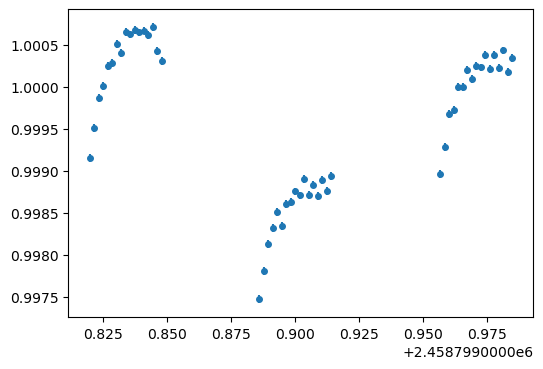

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(times_bb, fluxes_bb, errors_bb, ls='None', marker='o', ms=4)
plt.show()

In [4]:
## Loading in the extracted, binned spectral lighcurves
## from my 'Extracting the Transmission Spectra time series' notebook
tsdata = np.load('/home/mmmurphy/data/hd219666b/reduced_data/Transit_Spectra_NoFirst_Visit3.npz')
times = tsdata['time']
rawfluxes = tsdata['flux']
rawerrors = tsdata['error']
scandirs = tsdata['scandir']
#waves = tsdata['wavelengths']
    
# # Pull out times [in day; MJD] of each orbit
# orbit_ends = np.array([17, 34, 51])
# orbit2times = times[:orbit_ends[0]]
# orbit3times = times[orbit_ends[0] : orbit_ends[1]]
# orbit4times = times[orbit_ends[1] : orbit_ends[2]]

# # From above, compute time since beginning of orbit for each
# tinorbit2 = orbit2times - orbit2times[0]
# tinorbit3 = orbit3times - orbit3times[0]
# tinorbit4 = orbit4times - orbit4times[0]
# t_orbit = np.concatenate((tinorbit2, tinorbit3, tinorbit4))

fluxes = np.copy(rawfluxes)
errors = np.copy(rawerrors)
Nbins = rawfluxes.shape[0]
for wav in range(Nbins):
    # normalizing thomas'
    sd1_idxs = np.where(scandirs == 1.)[0]
    sd0_idxs = np.where(scandirs == 0.)[0]
    
    # if normalizing by max flux in second orbit:
#     orbit2_sd1 = rawfluxes[wav,:][sd1_idxs][:8]
#     orbit2_sd0 = rawfluxes[wav,:][sd0_idxs][:8]
#     normval1, normval0 = np.max(orbit2_sd1), np.max(orbit2_sd0)
    # if normalizing by median flux of whole visit
    normval1 = np.median(fluxes[wav, sd1_idxs])
    normval0 = np.median(fluxes[wav, sd0_idxs])
    
    fluxes[wav, sd1_idxs] /= normval1
    errors[wav, sd1_idxs] /= normval1
    fluxes[wav, sd0_idxs] /= normval0
    errors[wav, sd0_idxs] /= normval0

#errors /= 3.0
    

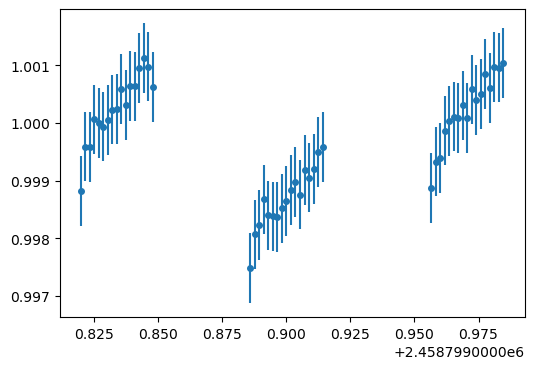

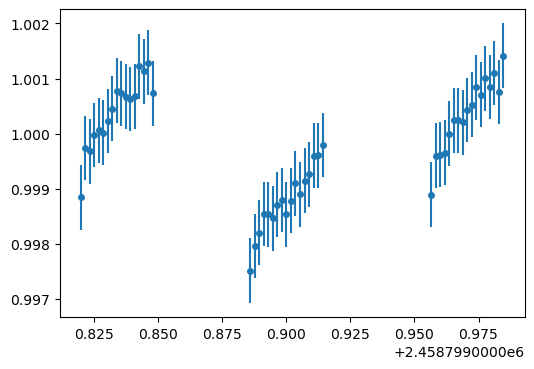

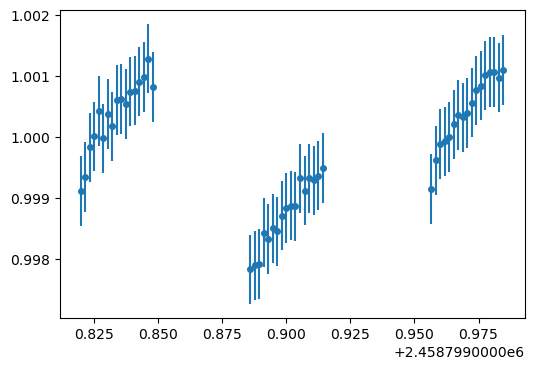

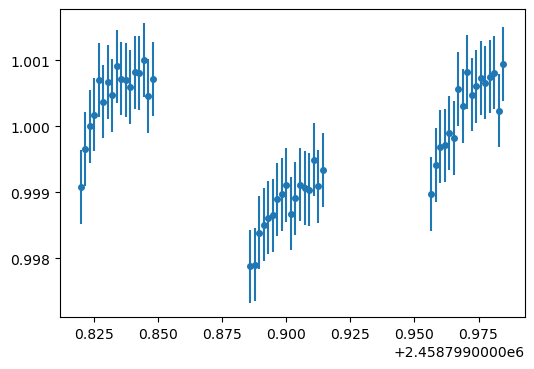

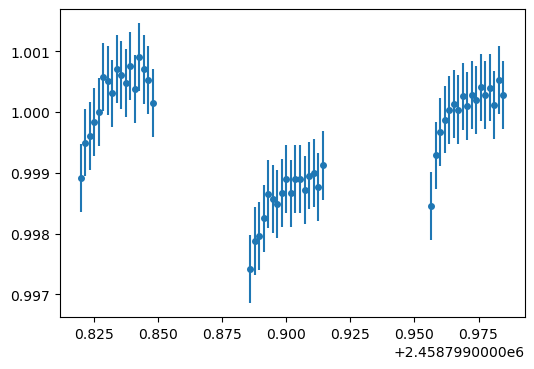

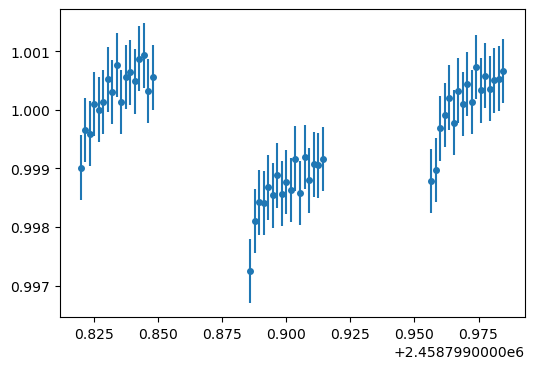

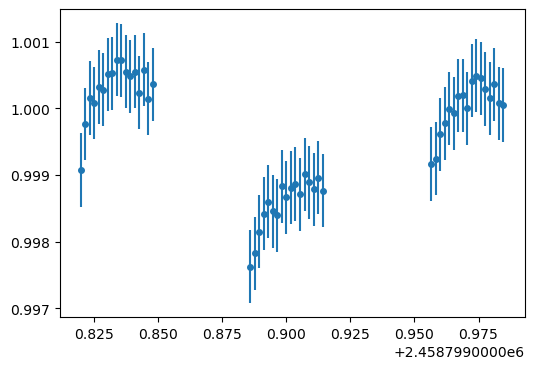

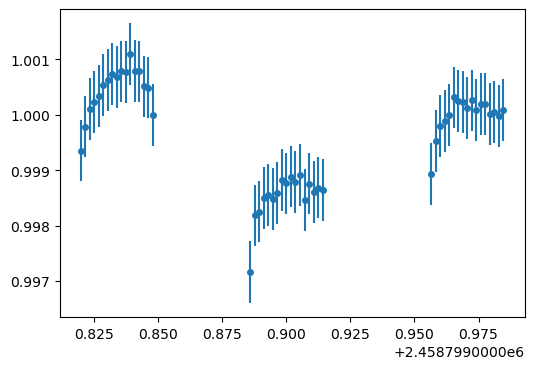

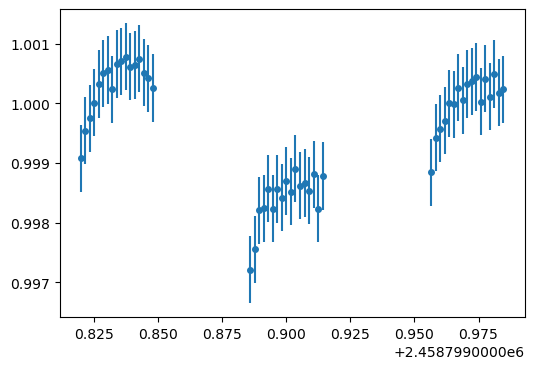

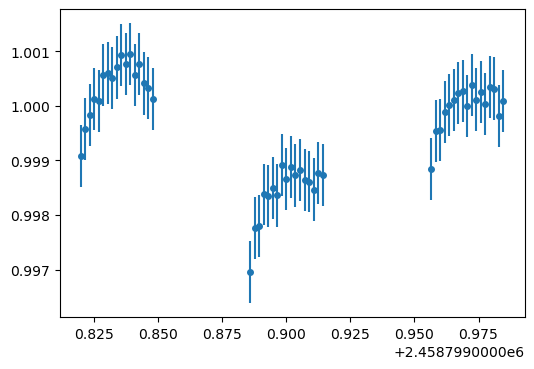

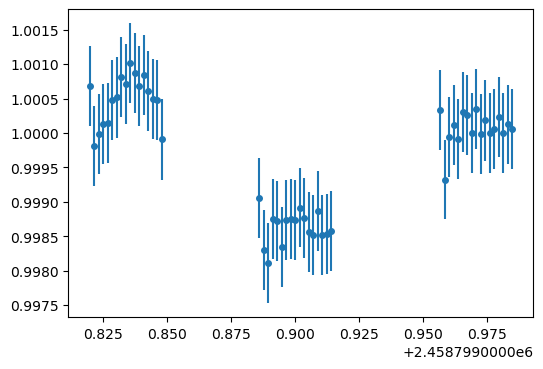

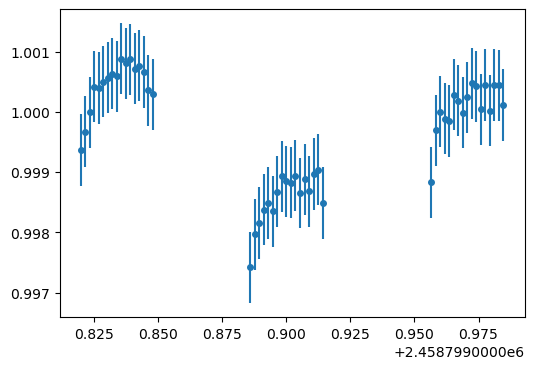

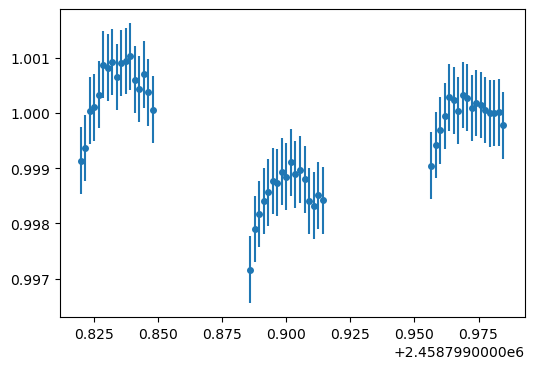

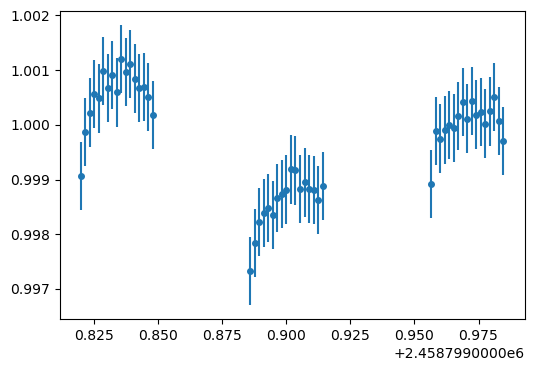

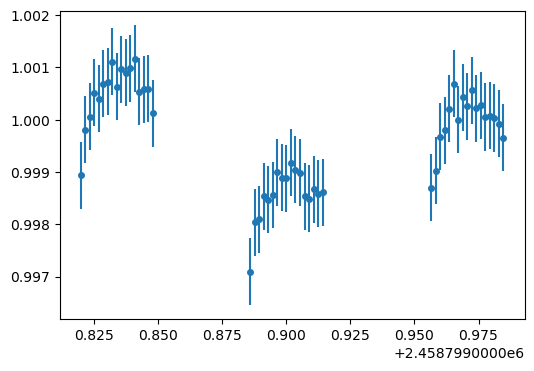

In [5]:
for wav in range(Nbins):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(times, fluxes[wav,:], errors[wav,:], ls='None', marker='o', ms=4)
    plt.show()